In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import lightgbm as lgb

In [24]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

target_col = ['사망자수','중상자수','경상자수','부상자수']

use_col = df_test.columns.tolist()
use_col.extend(target_col)

df_train = df_train[use_col]

In [25]:
df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

# ID

In [26]:
df_train.drop(['ID'], axis = 1,inplace = True)
df_test.drop(['ID'], axis = 1,inplace = True)

# 사고일시, 요일
    - 요일 사용 -> '년-월-일' 중 '일' 데이터 사용 X
    - 월, 시간 사용

In [27]:
df_train['date'] = df_train['사고일시'].str.split(expand=True)[0]
df_train['time'] = df_train['사고일시'].str.split(expand=True)[1]

df_test['date'] = df_test['사고일시'].str.split(expand=True)[0]
df_test['time'] = df_test['사고일시'].str.split(expand=True)[1]

df_train.drop(['사고일시'], axis = 1,inplace = True)
df_test.drop(['사고일시'], axis = 1,inplace = True)

In [28]:
df_train['month'] = df_train['date'].str.split('-', expand=True)[1]
df_test['month'] = df_test['date'].str.split('-', expand=True)[1]

In [29]:
df_train.drop(['date'], axis = 1,inplace = True)
df_test.drop(['date'], axis = 1,inplace = True)

In [30]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['요일'])], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['요일'])], axis=1)

df_train.drop(['요일'], axis = 1,inplace = True)
df_test.drop(['요일'], axis = 1,inplace = True)

## 학습

In [31]:
use_col = ['time','month','월요일','화요일','수요일','목요일','금요일','토요일','일요일']

In [32]:
X = df_train[use_col]
y = df_train['target']

In [33]:
X = X.astype('float')

In [34]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

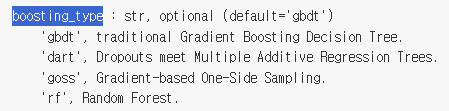

In [35]:
model = lgb.LGBMRegressor(learning_rate = 0.055, random_state=42, boosting_type='gbdt')

In [36]:
model.fit(x_train, y_train) 

LGBMRegressor(learning_rate=0.055, random_state=42)

In [37]:
pred = model.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [40]:
rmse(y_test, pred)

3.159920526750467

In [41]:
model.score(x_train, y_train)

0.028252581867740045

In [42]:
model.score(x_test, y_test)

0.0005247524526552638

# 기상상태

In [44]:
df_train.drop(df_train[df_train['기상상태'] == '안개'].index, axis = 0, inplace = True)

df_train.reset_index(drop=True, inplace = True)

In [45]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['기상상태'])], axis=1)

df_test = pd.concat([df_test, pd.get_dummies(df_test['기상상태'])], axis=1)

df_train.drop(['기상상태'], axis=1, inplace = True)
df_test.drop(['기상상태'], axis=1, inplace = True)

In [46]:
df_train.drop(columns='기타', axis=1,inplace=True)
df_test.drop(columns='기타', axis=1,inplace=True)

## 학습

In [47]:
df_train.columns

Index(['시군구', '도로형태', '노면상태', '사고유형', 'target', 'time', 'month', '금요일', '목요일',
       '수요일', '월요일', '일요일', '토요일', '화요일', '눈', '맑음', '비', '흐림'],
      dtype='object')

In [48]:
use_col = ['눈', '맑음', '비', '흐림']

In [49]:
X = df_train[use_col]
y = df_train['target']

In [50]:
X = X.astype('float')

In [51]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [116]:
model = lgb.LGBMRegressor(learning_rate = 0.0113, random_state=42, boosting_type='gbdt')

In [117]:
model.fit(x_train, y_train) 

LGBMRegressor(learning_rate=0.0113, random_state=42)

In [118]:
pred = model.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [121]:
rmse(y_test, pred)

3.2751687062893815

In [122]:
model.score(x_train, y_train)

0.00024114663735241848

In [123]:
model.score(x_test, y_test)

1.5978511935799133e-07

---

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

df_train = pd.read_csv("../data/df_train_004.csv")
df_test = pd.read_csv("../data/df_test_004.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [29]:
model = lgb.LGBMRegressor(learning_rate = 0.001, random_state=42, boosting_type='gbdt', n_estimators=20000)

In [30]:
model.fit(x_train, y_train) 

LGBMRegressor(learning_rate=0.001, n_estimators=20000, random_state=42)

In [31]:
pred = model.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [34]:
rmse(y_test, pred)

3.2573156506501917

In [35]:
model.score(x_train, y_train)

0.1511123863241337

In [36]:
model.score(x_test, y_test)

0.010872512073040963

In [37]:
feature_importance = pd.DataFrame(model.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,time,month,day,금요일,목요일,수요일,월요일,일요일,토요일,화요일,...,단일로,주차장,건조,서리/결빙,적설,젖음/습기,침수,차대사람,차대차,차량단독
feature_importance,134170,88884,156027,9517,7545,9501,10053,10041,11722,11334,...,17298,1254,3961,0,0,1944,0,5599,9011,3524
